In [61]:
Sys.Date()

[1] "2020-02-10"

In [62]:
libraries = c("dplyr","magrittr","tidyr", "purrr", "ggplot2","gridExtra","RColorBrewer","zoo","scales","colorspace","readxl")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE) }

'%&%' = function(x,y) paste0(x,y)

theme_set(theme_classic(base_size=12, base_family="sans"))
fnt_size = 11

In [63]:
drname = '../../results/sens_t0'
df = data.frame(filename=list.files(drname, pattern="incidence"), stringsAsFactors = FALSE) %>% 
    mutate(date = stringr::str_split(filename, "_") %>% map_chr(., 1))
df

filename,date
<chr>,<chr>
2019-12-01_incidence.csv,2019-12-01
2019-12-02_incidence.csv,2019-12-02
2019-12-03_incidence.csv,2019-12-03
2019-12-04_incidence.csv,2019-12-04
2019-12-05_incidence.csv,2019-12-05
2019-12-06_incidence.csv,2019-12-06
2019-12-07_incidence.csv,2019-12-07
2019-12-08_incidence.csv,2019-12-08
2019-12-09_incidence.csv,2019-12-09


In [64]:
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='r',] %>% select(-time,-var)
    if (i==1) 
        df_r = c(df[i,'date'], df_[1,] %>% as.numeric)
    else {
        df_r = rbind(df_r, c(df[i,'date'], df_[1,] %>% as.numeric))
    }
}
df_r  = data.frame(df_r, stringsAsFactors = FALSE, row.names = 1:nrow(df_r))
names(df_r) = c('date','mean','lower','upper')
df_r %<>% mutate(date = as.Date(date)) %>% mutate_each(as.numeric, -date)
df_r

date,mean,lower,upper
<date>,<dbl>,<dbl>,<dbl>
2019-12-01,0.116650,0.109231,0.123187
2019-12-02,0.120105,0.112684,0.126598
2019-12-03,0.123713,0.116012,0.130353
2019-12-04,0.127502,0.119674,0.134326
2019-12-05,0.131462,0.123648,0.138404
2019-12-06,0.135602,0.127634,0.142589
2019-12-07,0.140398,0.132277,0.147656
2019-12-08,0.144634,0.136299,0.151879
2019-12-09,0.149507,0.141102,0.156920


In [65]:
Sys.setlocale("LC_ALL","en_US.UTF-8");

[1] "LC_CTYPE=en_US.UTF-8;LC_NUMERIC=en_US.utf8;LC_TIME=en_US.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_MESSAGES=en_US.utf8;LC_PAPER=en_US.utf8;LC_NAME=en_US.utf8;LC_ADDRESS=en_US.utf8;LC_TELEPHONE=en_US.utf8;LC_MEASUREMENT=en_US.utf8;LC_IDENTIFICATION=en_US.utf8"

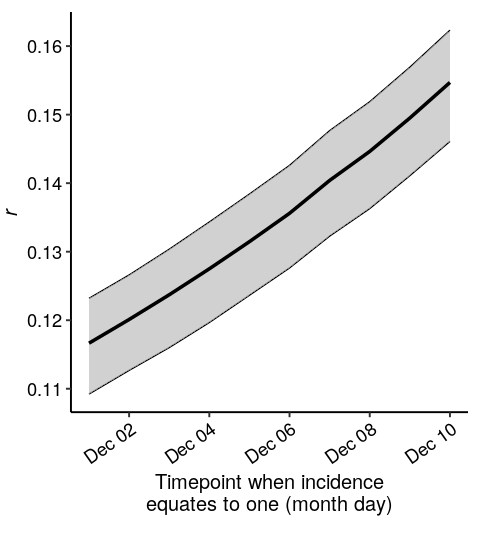

In [66]:
cs = c(4, 4.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

df_r %>% 
    ggplot(aes(x=date, y=mean, group = 1)) +
    geom_line(aes(y=lower), color="black", size=.4) +
    geom_line(aes(y=upper), color="black", size=.4) +
    geom_ribbon(data=df_r, aes(x=date, ymin = lower, ymax = upper), 
                alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), color="black", size=1) +
    xlab("Timepoint when incidence\nequates to one (month day)") + ylab(expression(italic(r))) +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) -> fig21

fig21

ggsave(plot=fig21, width=cs[1], height=cs[2],filename="../../figures/draft/figS11.pdf",useDingbats=FALSE)

In [67]:
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='Incidence',] %>% select(-var)
    if (i==1) {
        df_r = df_ %>% as.matrix
        df_r = cbind(rep(df$`date`[i], nrow(df_)), df_r)
    } else {
        df_r = rbind(df_r, cbind(rep(df$`date`[i], nrow(df_)), df_ %>% as.matrix))
    }
}
df_r  = data.frame(df_r, stringsAsFactors = FALSE, row.names = 1:nrow(df_r))
names(df_r) = c('t0','time','mean','lower','upper')
df_r %<>% mutate(t0 = as.Date(t0)) %>% mutate_each(as.numeric, -t0) %>% mutate(date = t0+time)
tail(df_r)

,t0,time,mean,lower,upper,date
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
490,2019-12-10,40,3171.823,2355.926,4062.651,2020-01-19
491,2019-12-10,41,3705.693,2727.628,4779.741,2020-01-20
492,2019-12-10,42,4329.311,3157.805,5623.212,2020-01-21
493,2019-12-10,43,5057.775,3655.657,6615.337,2020-01-22
494,2019-12-10,44,5908.728,4231.828,7782.315,2020-01-23
495,2019-12-10,45,6902.781,4898.640,9154.962,2020-01-24


In [68]:
date_max = df_r$date %>% max
date_max

[1] "2020-01-24"

In [69]:
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='CFR',] %>% select(-var)
    if (i==1) {
        df_CFR = df_ %>% as.matrix
        df_CFR = cbind(rep(df$`date`[i], nrow(df_)), df_CFR)
    } else {
        df_CFR = rbind(df_CFR, cbind(rep(df$`date`[i], nrow(df_)), df_ %>% as.matrix))
    }
}
df_CFR  = data.frame(df_CFR, stringsAsFactors = FALSE, row.names = 1:nrow(df_CFR))
names(df_CFR) = c('t0','time','mean','lower','upper')
t_max = df_CFR$`time` %>% as.numeric %>% max
df_CFR %<>% mutate(t0 = as.Date(t0)) %>% mutate_each(list(~as.numeric(.)*100), -t0) %>%
    mutate(time = time/100, date = date_max-t_max+time)
tail(df_CFR)

,t0,time,mean,lower,upper,date
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
155,2019-12-10,11,1.3075,0.3123,2.6562,2020-01-19
156,2019-12-10,12,1.8838,0.6978,3.3924,2020-01-20
157,2019-12-10,13,4.0342,2.2315,6.1711,2020-01-21
158,2019-12-10,14,4.5961,2.7613,6.7999,2020-01-22
159,2019-12-10,15,5.5617,3.6055,7.9448,2020-01-23
160,2019-12-10,16,5.7543,3.8585,8.1362,2020-01-24


Warning message:
“Removed 245 rows containing missing values (geom_path).”


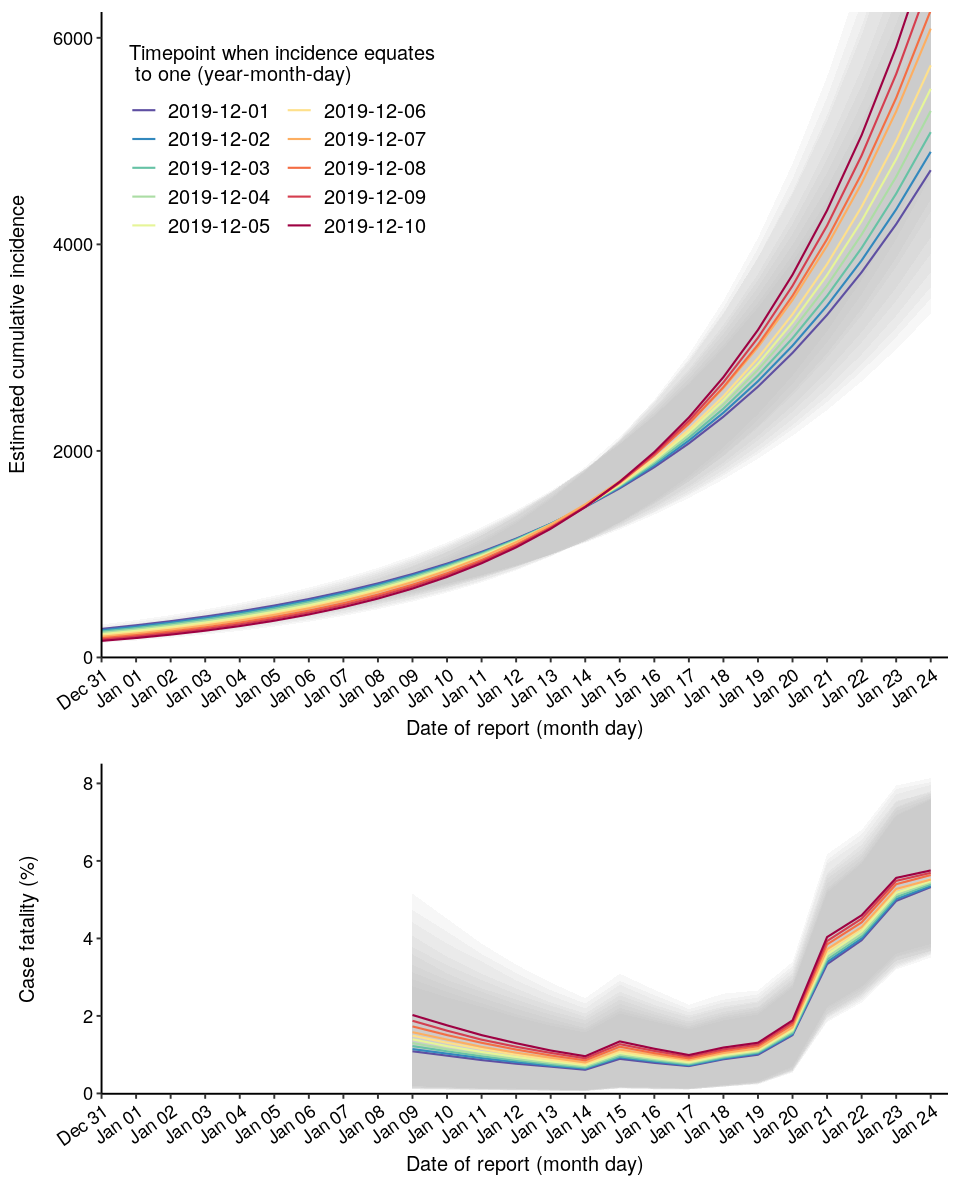

In [70]:
cs = c(8, 10)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

clrs = RColorBrewer::brewer.pal(9, "Blues")

df_r %>% mutate(t0 = as.factor(t0)) %>%
    ggplot(aes(x=date, y=mean, group = t0, color=t0)) +
    geom_ribbon(data=df_r, aes(x=date, ymin = lower, ymax = upper, group=t0), 
                alpha = 0.1, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), size=.6) +
    scale_color_brewer(palette = "Spectral", direction=-1) +
    xlab("Date of report (month day)") + 
    ylab("Estimated cumulative incidence\n") +
    guides(color=guide_legend(ncol=2, 
                              title = "Timepoint when incidence equates\n to one (year-month-day)")) + 
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          legend.position = c(0.22, 0.8),
          axis.title.y = element_text(vjust = .5),
          legend.text = element_text(size = 12, family="sans"),
          legend.spacing.y = unit(.25, 'cm')) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    coord_cartesian(ylim = c(0,6250)) -> fig22

df_CFR %>% mutate(t0 = as.factor(t0)) %>%
    ggplot(aes(x=date, y=mean, group = t0, color=t0)) +
    geom_ribbon(data=df_CFR, aes(x=date, ymin = lower, ymax = upper, group=t0), 
                alpha = 0.1, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), size=.6) +
    scale_color_brewer(palette = "Spectral", direction=-1) +
    xlab("Date of report (month day)") + 
    ylab("Case fatality (%)\n") +
    guides(color=F) + #guide_legend(ncol=2, title = "Timepoint when incidence equates\n to one (year-month-day)")) + 
    theme(plot.margin = unit(c(0,.5,1,1.5),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          axis.title.y = element_text(vjust = 4.5),
          axis.title = element_text(size=fnt_size+1, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    coord_cartesian(ylim = c(0,8.5)) -> fig23

pFinal = grid.arrange(fig22, fig23, heights=c(1.75,1), nrow=2, ncol=1);

ggsave(plot=pFinal, width=cs[1], height=cs[2],filename="../../figures/draft/figS12.pdf",useDingbats=FALSE)